In [ ]:

from google.colab import files
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *


uploaded = files.upload()



Saving bmi.csv to bmi.csv


In [ ]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['bmi.csv']))
df.head(10)

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2
5,59,1.71,79.32,27.126295,Overweight
6,59,1.70,73.32,25.370242,Overweight
7,59,1.72,85.32,28.839913,Overweight
8,59,1.46,36.00,16.888722,Underweight
9,59,1.83,104.70,31.263997,Obese Class 1


#Анализ

Числовые данные представлены столбцами:
*   **Age** -  Это поле количественно определяет возраст каждого человека, выраженный в годах.
*   **Height** - Столбец "Рост" содержит измерения роста испытуемых в метрах.
*   **Weight** - В столбце вес испытуемых указан количественно в килограммах.

*   **Bmi**(ИМТ) - важнейший числовой показатель, используемый для классификации людей на основе их веса по отношению к росту.

Значения среднего и медианы у параметров роста,возрата и ИМТ практически близки. Интересно проверить их на нормальность.
Значение же веса достаточно отличается. По-видимому это может быть связано с тем, что с юношеского возраста значение веса претерпевает сильные колебания из-за внешних обстоятельств.






In [ ]:
df.describe()

,Age,Height,Weight,Bmi
count,741.000000,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497,26.365427
std,11.655466,0.085974,32.254547,9.223191
min,15.000000,1.460000,25.900000,12.150497
25%,22.000000,1.670000,63.000000,22.129740
50%,29.000000,1.721000,72.900000,24.132412
75%,40.000000,1.751000,83.300000,27.249306
max,61.000000,2.070000,270.000000,66.301350


# Нормальность

Как можно увидеть из графиков распредления значение роста действительно является нормально распределенным. Также можно сделать строгий вывод касаемо значений возраста - распределение точно не нормально.

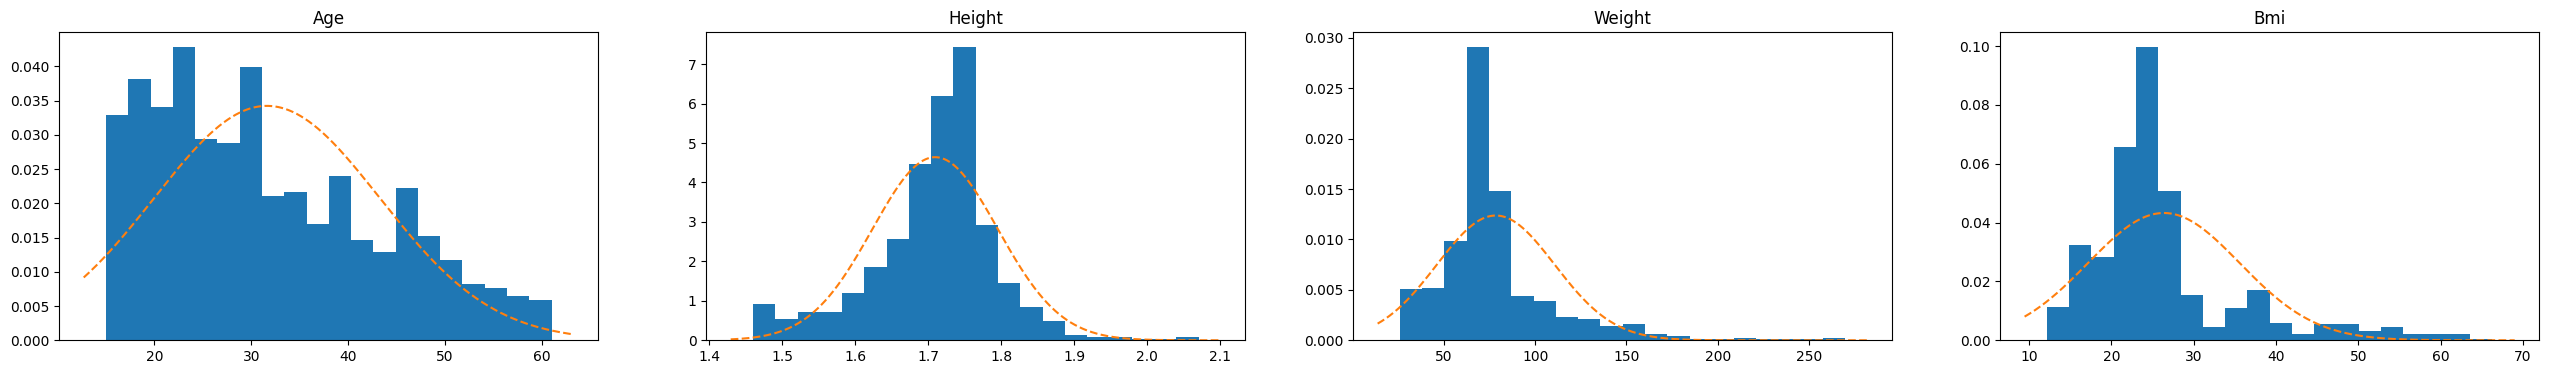

In [ ]:
keys = ['Age', 'Height', 'Weight', 'Bmi']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True,bins =20)

    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 1000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

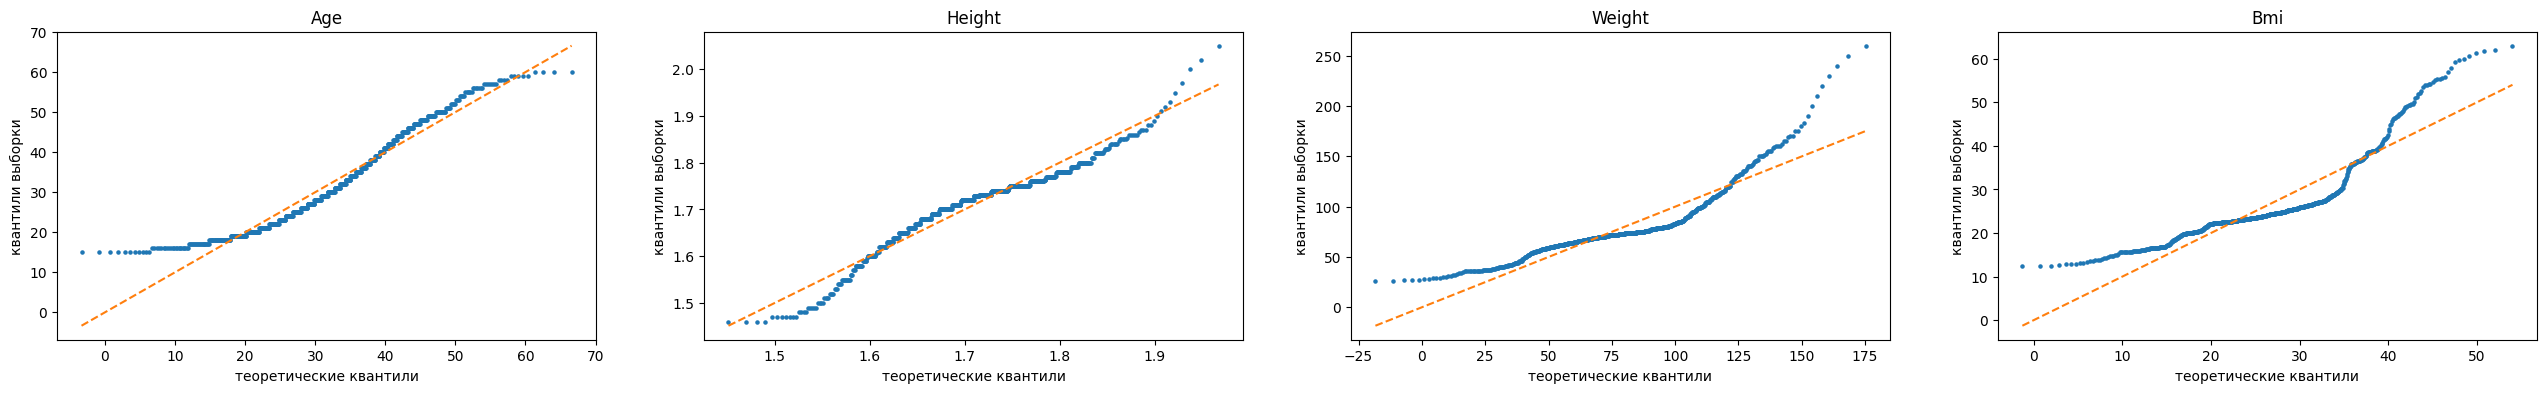

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

При анализе Q-Q прямых данных из выборки можно говорить об относительно нормальном распределении значений возраста и роста. На значение ИМТ по всей видимости повлияло большое колебание веса.

In [ ]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

Age
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6410256410256411
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9541160593792173
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Height
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7557354925775979
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9365721997300944
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9932523616734144

Weight
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.766531713900135
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9473684210526315
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9851551956815114

Bmi
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7368421052631579
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9325236167341431
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9743589743589743



Вероятность попасть в интервал от  μ−σ  до  μ+σ  равна  0.68 ,
В интервал от  μ−2σ  до  μ+2σ  —  0.95 ,
В интервал от  μ−3σ  до  μ+3σ  —  0.997 .
Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными.

Тот факт, что распределения данных значений явлются нормальными или близкими к ним позволяет использовать другие методы для анализа взаимосвязей в данных.

#Поиск зависимостей

Проверим есть ли статистическая связь между числовыми параметрами базы данных.

In [ ]:
df[['Height', 'Weight', 'Age','Bmi']].corr()

,Height,Weight,Age,Bmi
Height,1.000000,0.607672,0.023128,0.433309
Weight,0.607672,1.000000,0.109610,0.966921
Age,0.023128,0.109610,1.000000,0.139157
Bmi,0.433309,0.966921,0.139157,1.000000


Из полученных данных можно предположить прямую зависимость между весом и ИМТ(чем выше вес, тем выше показатель ИМТ), ростом и весом(Чем выше рост человека, тем больше его вес). Остальные же величины мало коррелируют друг с другом и возможно имеют другой характер зависимости.


# Статистический тест

Подтвердим линейную зависимость величин с помощью статистического теста и визуализации.
Чтобы определить, являются ли результаты теста F статистически значимыми, можно сравнить статистику F с критическим значением t. Если статистика F больше критического значения t, то результаты теста статистически значимы, а значит зависимость есть.

In [ ]:
n = 741
m = 1

k1 = m
k2 = n - m - 1
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.854072842480432

In [ ]:
ones = np.ones((741,1))
x_pot = np.hstack((ones, df['Weight'].values.reshape(741,1)))
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Bmi'])
z = x_pot.dot(b)
e = df['Bmi'] - z

R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['Bmi']))
print(R)

F = (R / k1) / ((1 - R) / k2)
F

0.9349354366359535


10618.949116866857

Т.к. F > t, то связь есть. Визуализируем это.

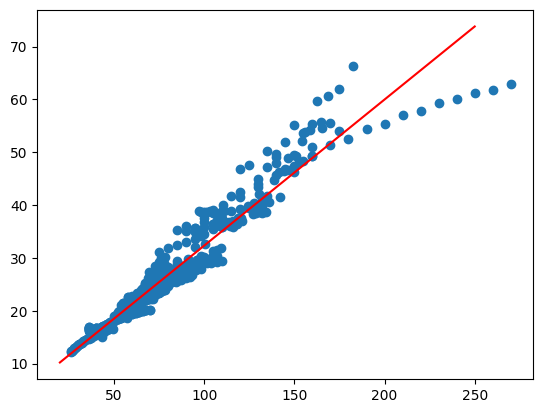

In [ ]:
b1 = np.cov(df['Weight'], df['Bmi'], ddof=1)[0, 1] / np.var(df['Weight'], ddof=1)
b0 = df['Bmi'].mean() - b1 * df['Weight'].mean()

plt.scatter(df['Weight'], df['Bmi'])
x = np.linspace(20, 250, 600)
y = b1*x + b0
plt.plot(x, y, color = 'r')
plt.show()

Покажем наличие связи между ростом и весом аналогичным образом.

In [ ]:
ones = np.ones((741,1))
x_pot = np.hstack((ones, df['Height'].values.reshape(741,1)))
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Weight'])
z = x_pot.dot(b)
e = df['Weight'] - z

R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['Weight']))


F = (R / k1) / ((1 - R) / k2)
F

432.64854603196875

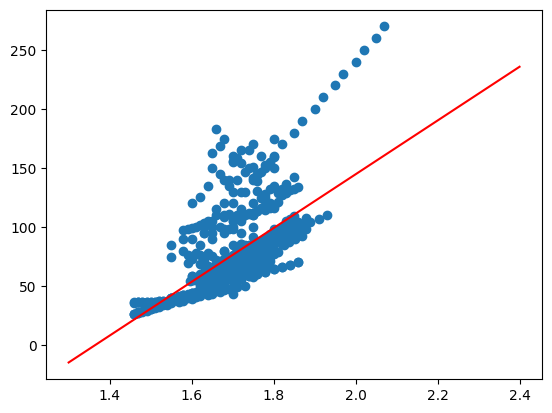

In [ ]:
b1 = np.cov(df['Height'], df['Weight'], ddof=1)[0, 1] / np.var(df['Height'], ddof=1)
b0 = df['Weight'].mean() - b1 * df['Height'].mean()

plt.scatter(df['Height'], df['Weight'])
x = np.linspace(1.3, 2.4, 100)
y = b1*x + b0
plt.plot(x, y, color = 'r')
plt.show()

#Влияние возраста на проблемы со здоровьем

In [ ]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [ ]:
df1 = df[df['BmiClass'] == 'Overweight']
df2 = df[df['BmiClass'] == 'Underweight']

var_analise(df, df1, df2, 'Age')

True

In [ ]:
res1_mean = df1['Age'].mean()
res2_mean = df2['Age'].mean()

print(f'Age of heavy: {res1_mean}, Age of skinny {res2_mean}')

Age of heavy: 39.18072289156626, Age of skinny 29.833333333333332


Анализ показывает, что проблема ожирения характернее для зрелых людей. Оно и понятно, ведь чем моложе человек, тем больше он обеспокоен вопросами своего внешнего вида.

# Влияние роста на проблемы с ожирением

In [ ]:
df1 = df[df['BmiClass'] == 'Underweight']
df2 = df[df['BmiClass'] == 'Overweight']

var_analise(df, df1, df2, 'Height')

True

In [ ]:
res1_mean = df1['Height'].mean()
res2_mean = df2['Height'].mean()

print(f'Height of skinny: {res1_mean}, Height of heavy {res2_mean}')

Height of skinny: 1.5636458333333334, Height of heavy 1.7413771084337353


Проблема ожирения наиболее характерна для людей с нормальным/высоким ростом, тогда как "недоедают" в среднем чаще низкие люди.

In [ ]:
df1 = df[df['BmiClass'] == 'Obese Class 1']
df2 = df[df['BmiClass'] == 'Obese Class 2']

var_analise(df, df1, df2, 'Height')

False

In [ ]:
res1_mean = df1['Height'].mean()
res2_mean = df2['Height'].mean()

print(f'Height of huge: {res1_mean}, Height of super huge {res2_mean}')

Height of huge: 1.723, Height of super huge 1.719818181818182


В свою очередь рост никак не влияет на усугубление проблемы с ожирением.

#Выводы

Таким образом, ИМТ является важным показателем для отслеживания своего здоровья.Зная свой рост и вес можно с легкостью понять свою принадлежность к определенному классу и скорректировать при необходимости стиль жизни.
Следует помнить, что с возрастом наши метаболитические процессы замедляются и согнать лишний вес становится не так-то просто.